In [1]:
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import pandas as pd

from rdkit.Chem import rdMolDescriptors, Descriptors
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from tqdm.notebook import tqdm

from matplotlib import cm
plasma = cm.get_cmap('plasma', 32)

RDKit WARNING: [07:49:16] Enabling RDKit 2019.09.3 jupyter extensions


In [5]:
data1 = pd.read_csv("enamine_enum_props.csv")

data1["source"] = ["enumerated"] * len(data1)

In [7]:
34093126 in list(data1.rmat_tag)

True

In [14]:
data1_props = data1[list(data1)[4:-1]].copy()

In [19]:
amide_row = np.array(data1[data1.rmat_tag==34093126][list(data1)[4:-1]])

In [20]:
data1_deltas = data1_props-amide_row

In [21]:
data1[['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']] = data1_deltas

In [25]:
data2 = pd.read_csv("enamine_small_props.csv")

In [26]:
data2["source"] = ["small"] * len(data2)

In [28]:
data2_props = data2[list(data2)[4:-1]].copy()

amide_row = np.array(data2[data2.rmat_tag==34093126][list(data2)[4:-1]])

data2_deltas = data2_props-amide_row

In [29]:
data2[['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']] = data2_deltas

In [30]:
data1_melt = pd.melt(data1,id_vars=["source"],value_vars = ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED'])

data2_melt = pd.melt(data2,id_vars=["source"],value_vars = ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED'])

data_both = pd.concat((data1_melt,data2_melt))

In [31]:
data_both.head()

,source,variable,value
0,enumerated,LogP,-0.3642
1,enumerated,LogP,-0.3901
2,enumerated,LogP,-0.4059
3,enumerated,LogP,-0.9908
4,enumerated,LogP,-0.6546


In [32]:
data_both.reset_index(drop=True,inplace=True)

data1_melt = []
data2_melt = []

In [33]:
output = data_both

output.reset_index(drop=True,inplace=True)

# plot_props = ["logP","ROTB"]
# output_plot = output[output.property.isin(plot_props)]
# output_plot.head(3)

output_plot = output
plot_props = ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']



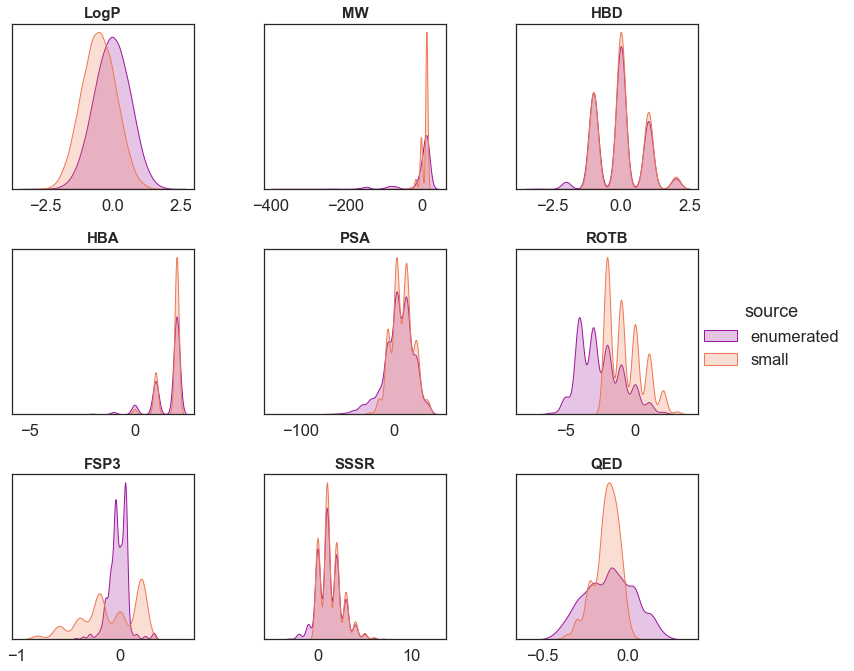

In [34]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)},font_scale=1.5)
g = sns.FacetGrid(output_plot,col = "variable",hue="source",
                  aspect=1,height=1.16798*3,col_wrap=3,
                  sharex=False,sharey=False,palette="plasma")

g.map(sns.kdeplot, "value",clip_on=True,shade=True,bw_method=0.2);
# g.map(sns.distplot, "value");
g.set(yticks=[])
# g.set(xticks=[0.0,1.0])
g.despine(top=False, right=False)
# titles = props

for i, ax in enumerate(g.axes.flat): # set every-other axis for testing purposes
    title = plot_props[i]
    
    ax.set_title(title, fontweight='bold',fontsize=15)
# #     ax.set_xticklabels([round(i,2) for i in main_minmax[title]],rotation=45,fontsize=10)
#     ax.set_xticklabels([round(minmax_dict[title][0],2),round(minmax_dict[title][-1],2)])
#     ax.set_xlim(-.5,1.5)
#     ax.axvline(amide_line[i], color=plasma(0), linewidth=2)
#     ax.axvline(data_means_interp[i][0], color=plasma(0.25)) # original
#     ax.axvline(data_means_interp[i][1], color=plasma(0.75)) # enumerated
g.add_legend()
g.set_xlabels("")
plt.subplots_adjust(top=0.9)
# g.fig.suptitle(plot_title,fontweight='bold',fontsize=25)
g.savefig("ridgeplot_enamine.png")

In [51]:
prop = "MW"

In [52]:
lims

[-3.0374000000000008, 2.2874000000000008]

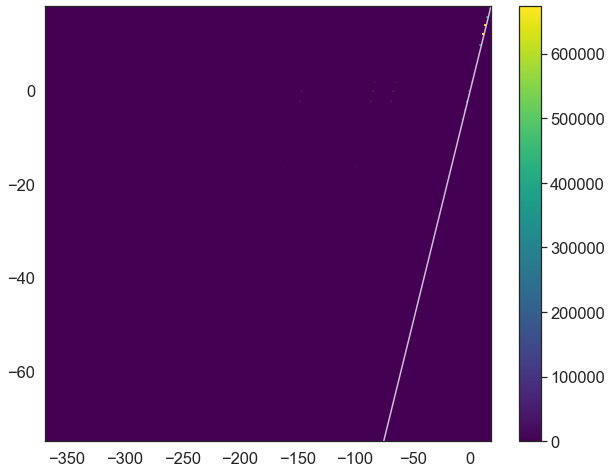

In [56]:
plt.hist2d(data1[prop],data2[prop],cmap="viridis",bins=200)
ax = plt.gca()
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'w-', alpha=0.75)
plt.colorbar()
pass

0
1
2
3
4
5
6
7
8


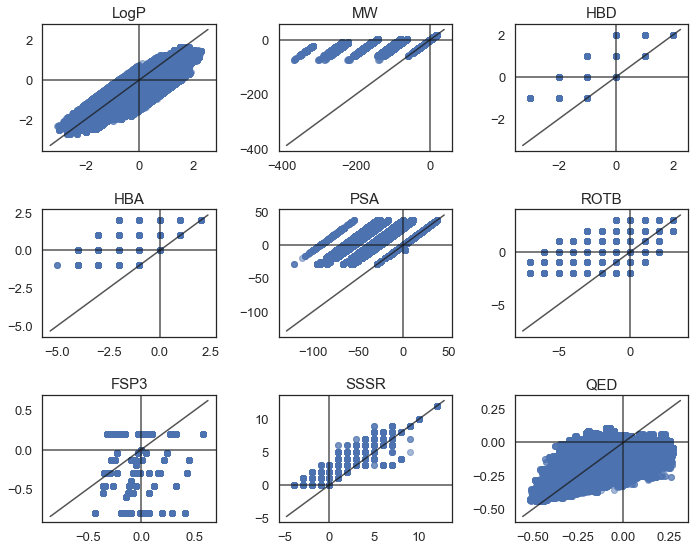

In [54]:
molprops =  ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']

fig,axs = plt.subplots(3,3)

for i, ax in enumerate(fig.axes):
    print(i)
    ax.scatter(data1[molprops[i]],data2[molprops[i]],alpha=0.5)
#         ax = plt.gca()

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75)
    ax.tick_params(axis='both', which='major', labelsize=13)
#     ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.axvline(c='k',alpha=0.75)
    ax.axhline(c='k',alpha=0.75)
#     plt.xlabel("Finasteride")
#     plt.ylabel("Simple system")
    ax.set_title(molprops[i],fontsize=15)
plt.tight_layout()

0
1
2
3
4
5
6
7
8


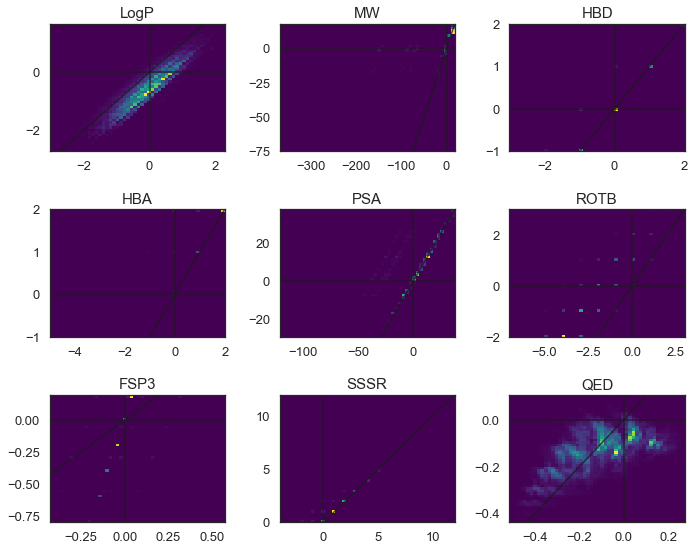

In [59]:
molprops =  ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']

fig,axs = plt.subplots(3,3)

for i, ax in enumerate(fig.axes):
    print(i)
    ax.hist2d(data1[molprops[i]],data2[molprops[i]],cmap="viridis",bins=50)
#         ax = plt.gca()

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75)
    ax.tick_params(axis='both', which='major', labelsize=13)
#     ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.axvline(c='k',alpha=0.75)
    ax.axhline(c='k',alpha=0.75)
#     plt.xlabel("Finasteride")
#     plt.ylabel("Simple system")
    ax.set_title(molprops[i],fontsize=15)
plt.tight_layout()